<a href="https://colab.research.google.com/github/Msamuelsons/classificacao-pacientes-coluna/blob/main/Biomechanical_features_of_orthopedic_patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
dados = pd.read_csv('/content/column_2C_weka.csv')
dados.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [2]:
# Verificação de valores faltantes
faltantes = dados.isnull().sum()
faltantes

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [3]:
# Verificação da tipagem de dados
tipagem = dados.dtypes
tipagem

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [4]:
# Separação de preditores e target
y = pd.Series(dados['class'])
x = dados.drop('class', axis=1)

In [5]:
y_encoded = y.map({'Abnormal': 0, 'Normal': 1})

## Descobrindo os melhores parâmetros

In [16]:
import numpy as np
from sklearn.model_selection import GridSearchCV
minimos_split = np.array([2,3,4,5,6,7,8])
maximos_nivel = np.array([3,4,5,6])

algoritmos = ['gini', 'entropy']
valores_grid_search = {'min_samples_split':minimos_split, 'max_depth':maximos_nivel, 'criterion':algoritmos}

modelo_teste_parametro = DecisionTreeClassifier()
gridDecisionTree = GridSearchCV(estimator=modelo_teste_parametro, param_grid=valores_grid_search, cv=5)
gridDecisionTree.fit(x, y_encoded)

print(f'Mínimo split: {gridDecisionTree.best_estimator_.min_samples_split}')
print(f'Máxima profundidade: {gridDecisionTree.best_estimator_.max_depth}')
print(f'Algoritmo escolhido: {gridDecisionTree.best_estimator_.criterion}')
print(f'acurácia: {gridDecisionTree.best_score_}')


Mínimo split: 4
Máxima profundidade: 5
Algoritmo escolhido: entropy
acurácia: 0.767741935483871


## Aplicando modelo

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [8]:
kfold = StratifiedKFold(n_splits=5, random_state=8, shuffle=True)

In [9]:
modelo = DecisionTreeClassifier(min_samples_split=8, max_depth=6, criterion='gini')
resultado = cross_val_score(modelo, x, y_encoded, cv=kfold)

In [10]:
print(f'Acurácia: {resultado.mean()}')

Acurácia: 0.8129032258064516


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)
modelo_grafico = DecisionTreeClassifier(min_samples_split=8, max_depth=6, criterion='gini')
modelo_grafico.fit(x_train, y_train)
y_pred = modelo_grafico.predict(x_test)


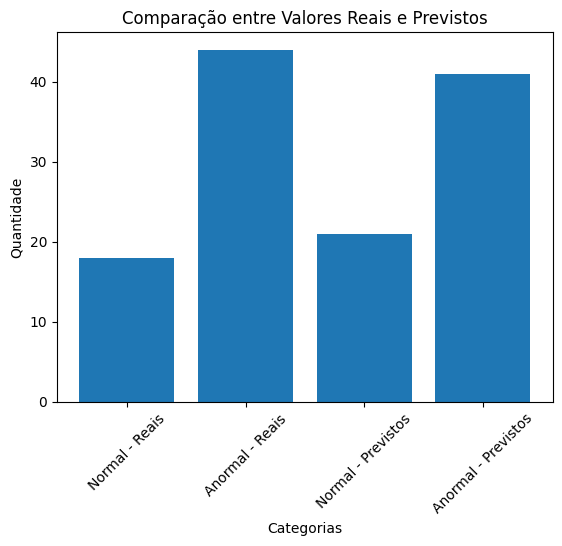

In [23]:
import matplotlib.pyplot as plt
plt.scatter(y, y_encoded)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação entre Valores Reais e Previstos')
plt.show()

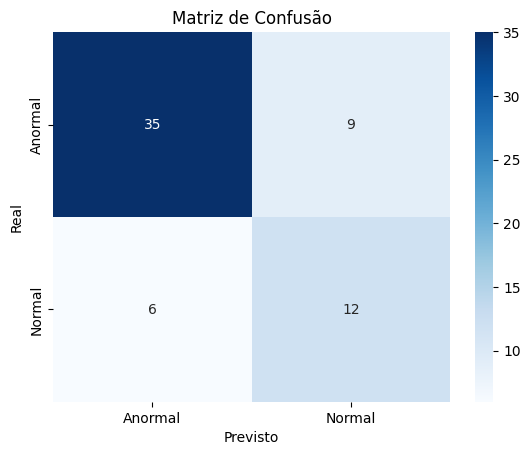

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Faça previsões nos dados de teste
y_pred = modelo_grafico.predict(x_test)

# Crie a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plote a matriz de confusão como um heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Anormal', 'Normal'], yticklabels=['Anormal', 'Normal'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()
